<a href="https://colab.research.google.com/github/PabloCGarcia/deepLearning/blob/main/Clase01_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

red_wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])



In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
from sklearn.model_selection import train_test_split
X = red_wine.copy()
Y = X.pop('quality')
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    batch_size=64,
    epochs=100,
)

Epoch 1/100
17/17 [==============================] - 2s 50ms/step - loss: 5.4654 - val_loss: 5.0436
Epoch 2/100
17/17 [==============================] - 0s 17ms/step - loss: 4.8890 - val_loss: 5.3128
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 4.1390 - val_loss: 3.7550
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 3.2811 - val_loss: 1.5313
Epoch 5/100
17/17 [==============================] - 0s 16ms/step - loss: 2.3110 - val_loss: 2.2125
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 1.7691 - val_loss: 0.8167
Epoch 7/100
17/17 [==============================] - 0s 17ms/step - loss: 1.5880 - val_loss: 2.3353
Epoch 8/100
17/17 [==============================] - 0s 17ms/step - loss: 1.3965 - val_loss: 0.7946
Epoch 9/100
17/17 [==============================] - 0s 16ms/step - loss: 1.3044 - val_loss: 0.7224
Epoch 10/100
17/17 [==============================] - 0s 24ms/step - loss: 1.2063 - val_loss: 0.8425

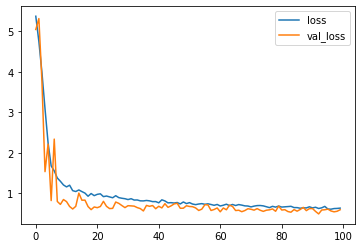

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot();